## Решение задачи бинарной классификации

План практической части:
* решим задачу классификации с помощью логистической регрессии
* изучим пайплайны
* научимся подбирать гиперпараметры моделей

### Логистическая регрессия

y = {-1, 1}

$a(x) = \sigma(<w,x>)$, где $\sigma(z) = \frac{1}{1 + e^{-z}}$

Логистическая регрессия - это линейный классификатор, который кроме классов умеет предсказывать вероятности классов, а именно, $a(x) = P(y = +1 | x)$


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('bike_buyers_clean.csv')

In [31]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [32]:
data.drop(['ID'],axis=1,inplace=True)

# Обзор данных

In [33]:
# проверим типы колонок в датасете
data.dtypes

Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

## Кодируем категориальные столбцы

In [34]:
# data = pd.get_dummies(data, columns=['Marital Status', 'Gender', 'Education', 'Occupation',\
#                                     'Commute Distance', 'Region'], drop_first=True)

data.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Оставим в данных только числовые колонки.

In [35]:
X = data._get_numeric_data()
y = data['Purchased Bike']

X.head()

,Income,Children,Cars,Age
0,40000,1,0,42
1,30000,3,1,43
2,80000,5,2,60
3,70000,0,1,41
4,30000,0,0,36


In [36]:
y.head()

0     No
1     No
2     No
3    Yes
4    Yes
Name: Purchased Bike, dtype: object

Проверим сбалансированность классов.

In [37]:
y.value_counts(normalize=True)

Purchased Bike
No     0.519
Yes    0.481
Name: proportion, dtype: float64

Переведем классы в числа 0 и 1.

In [38]:
y = (y == 'Yes').astype(int)
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: Purchased Bike, Length: 1000, dtype: int32

## Масштабирование числовых признаков

In [39]:
X.head()

,Income,Children,Cars,Age
0,40000,1,0,42
1,30000,3,1,43
2,80000,5,2,60
3,70000,0,1,41
4,30000,0,0,36


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X[['Income']])

array([[-0.51953796],
       [-0.8414326 ],
       [ 0.76804062],
       [ 0.44614598],
       [-0.8414326 ],
       [-1.48522189],
       [ 3.34319779],
       [-0.51953796],
       [-1.16332725],
       [-1.16332725],
       [-0.8414326 ],
       [ 1.08993527],
       [ 3.66509243],
       [-0.51953796],
       [ 0.12425133],
       [-1.48522189],
       [-0.8414326 ],
       [-0.8414326 ],
       [-0.51953796],
       [-1.16332725],
       [-0.51953796],
       [ 0.76804062],
       [-0.51953796],
       [ 0.76804062],
       [-0.51953796],
       [-0.8414326 ],
       [-0.8414326 ],
       [ 1.41182991],
       [ 0.44614598],
       [-1.16332725],
       [-1.16332725],
       [-1.48522189],
       [-1.16332725],
       [ 0.76804062],
       [ 1.08993527],
       [-1.48522189],
       [-1.48522189],
       [-0.8414326 ],
       [-1.16332725],
       [-1.48522189],
       [-0.8414326 ],
       [-0.51953796],
       [-1.48522189],
       [ 3.66509243],
       [-1.16332725],
       [-1

Важное замечание:
- любое преобразование признаков в ML-задачах нужно обучать только на тренировочных данных

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # функция оценки качества

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train) # алгоритм находит параметры: m и sigma

X_train_sc = scaler.transform(X_train) # нормирует: x->(x-m)/sigma
X_test_sc = scaler.transform(X_test)

In [17]:
X_train_sc

array([[-0.85166052, -1.14844718, -1.29910766,  0.23313434],
       [ 0.10885886,  0.06726967,  0.46598427,  0.58092302],
       [ 0.42903199,  1.89084493,  0.46598427, -0.02770716],
       ...,
       [-0.53148739, -1.14844718, -0.41656169, -1.50580905],
       [-0.85166052, -0.54058876,  0.46598427, -0.37549584],
       [ 2.35007076,  1.89084493,  2.23107619,  1.27650038]])

In [18]:
X_train = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

X_train.head()

,Income,Children,Cars,Age
82,-0.851661,-1.148447,-1.299108,0.233134
971,0.108859,0.067270,0.465984,0.580923
439,0.429032,1.890845,0.465984,-0.027707
0,-0.531487,-0.540589,-1.299108,-0.201602
997,0.108859,0.067270,-1.299108,-0.549390


Обучим логистическую регрессию и посмотрим на качество модели.

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.624

Pipeline (пайплайн) - инструмент sklearn, позволяющий объединять в единую структуру несколько шагов по работе с данными. Готовый pipeline ведёт себя как обычная модель, то есть, имеет методы fit и predict.

In [21]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('model_', LogisticRegression(C=100))
    ])

In [22]:
# пример работы с пайплайном

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.624


## Интерпретация результатов

In [23]:
model.coef_, model.intercept_

(array([[ 0.43479154, -0.15792797, -0.58600071, -0.06094747]]),
 array([-0.07419054]))

In [24]:
coefs = pd.DataFrame(model.coef_, index=np.arange(len(model.coef_)), columns=X_train.columns)
coefs['Intercept'] = model.intercept_
coefs

,Income,Children,Cars,Age,Intercept
0,0.434792,-0.157928,-0.586001,-0.060947,-0.074191


## Подбор гиперпараметров модели

In [25]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

cross_val_score(model, X, y, cv=3).mean()

0.5310550071029113

In [26]:
from sklearn.model_selection import GridSearchCV # поиск по сетке

params = {'C' : [0.0001, 0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 20, 100, 1000],
          'class_weight' : [None, 'balanced'],
          'penalty' : ['l1', 'l2']} # регуляризация

gs = GridSearchCV(LogisticRegression(solver='liblinear'), params, cv=3, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 20,
                               100, 1000],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [41]:
gs.best_score_

0.6309692926459394

In [40]:
gs.best_estimator_

LogisticRegression(C=0.3, class_weight='balanced', penalty='l1',
                   solver='liblinear')

## Метрики качества классификации

Метрика accuracy не учитывает тип ошибки. Проанализируем ошибки нашего алгоритма, используя другие метрики.

In [43]:
import itertools
from sklearn.metrics import confusion_matrix

from matplotlib import pylab as plt
%pylab inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Populating the interactive namespace from numpy and matplotlib


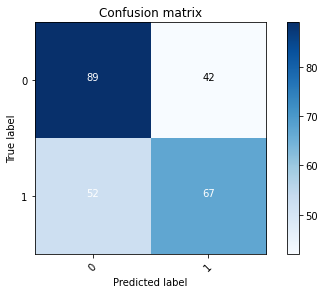

In [45]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['0','1'],
                        title='Confusion matrix')

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision: ', precision_score(y_test, y_pred))
print('recall: ',    recall_score(y_test, y_pred))
print('f1-score: ',  f1_score(y_test, y_pred))

precision:  0.6146788990825688
recall:  0.5630252100840336
f1-score:  0.5877192982456141
